In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons
import math
import os
import time
import itertools

%matplotlib notebook

<IPython.core.display.Javascript object>


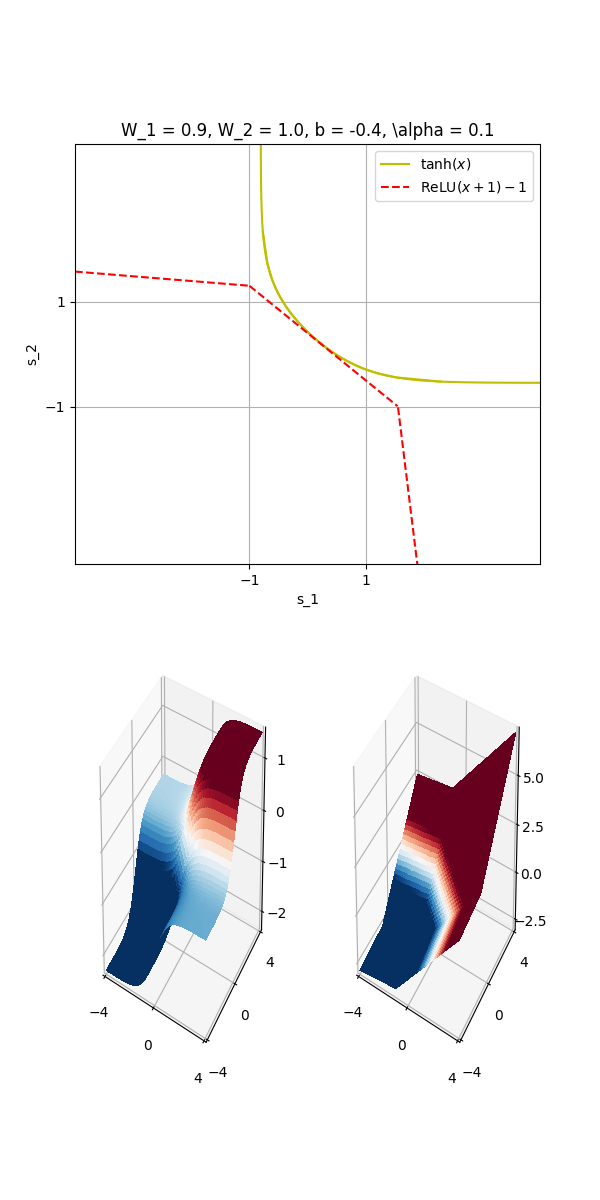

In [18]:
width = 4.0
Wx = -1.0
Wy = 1.0
b = -0.4
alpha = 0.1
plt.rcParams['figure.figsize'] = [6, 12]
fig = plt.figure()
ax = fig.add_subplot(211)
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')

#fig, ax = plt.subplots()

#plt.subplots_adjust(left=0.25)
#rax = plt.axes([0, 0.2, 0.2, 0.7])
#plt.rc('text', usetex=True)

lines = []
labels=[]
visibility=[]
img = None

def func(label):
    index = labels.index(label)
    lines[index].set_visible(not lines[index].get_visible())
    plt.draw()

def modifier(event):
    global Wx
    global Wy
    global b
    global alpha
    global width
    global lines
    global labels
    global visibility
    global img
    
    color = iter(['r', 'g', 'b', 'y'])
    
    if event:
        if event.key == '.':
            Wx = Wx + 0.1
            if Wx == 0:
                Wx = 0.1
        elif event.key == ',':
            Wx = Wx - 0.1
            if Wx == 0:
                Wx = -0.1
        elif event.key == 'l':
            Wy = Wy + 0.1
            if Wy == 0:
                Wy = 0.1
        elif event.key == 'k':
            Wy = Wy - 0.1
            if Wy == 0:
                Wy = -0.1
        elif event.key == "o":
            b = b + 0.1
        elif event.key == 'i':
            b = b - 0.1
        elif event.key == "j":
            alpha = alpha + 0.1
        elif event.key == 'h':
            alpha = alpha - 0.1
        
    ax.clear()
    #ax2.clear()
    ax3.clear()
    ax4.clear()
    
    def evalTanh(x, y):
        return Wx*np.tanh(x) + Wy*np.tanh(y) + b
    def evalReLU(x, y):
        Z = np.zeros(X.shape[0])
        
        bothIdx = np.logical_and(x > -1, y > -1)
        xIdx = np.logical_and(x > -1, y <= -1)
        yIdx = np.logical_and(x <= -1, y > -1)
        neitherIdx = np.logical_and(x <= -1, y <= -1)
        
        Z[bothIdx] = Wx*(x[bothIdx]+1) + Wy*(y[bothIdx]+1) + b - Wx - Wy
        Z[xIdx] = Wx*(x[xIdx]+1) + alpha*Wy*(y[xIdx]+1) + b - Wx - Wy
        Z[yIdx] = alpha*Wx*(x[yIdx]+1) + Wy*(y[yIdx]+1) + b - Wx - Wy
        Z[neitherIdx] = alpha*Wx*(x[neitherIdx]+1) + alpha*Wy*(y[neitherIdx]+1) + b - Wx - Wy
        
        return Z
    
    # Tanh
    x = np.linspace(-width, width, 100)
    val = (-b - Wx*np.tanh(x))/(Wy)
    idx = np.logical_and(val >= -1, val <= 1)

    x = x[idx]
    y = np.arctanh(val[idx])

    ax.plot(x, y, color='y')
    
    y = np.linspace(-width, width, 100)
    val = (-b - Wy*np.tanh(y))/(Wx)
    idx = np.logical_and(val >= -1, val <= 1)
    
    y = y[idx]
    x = np.arctanh(val[idx])
    
    lTanh,  = ax.plot(x, y, color='y', label='tanh')
    
    # ReLU
    # Use ReLU(x + 1) - 1
    # 0 = Wx(Relu(x + 1) - 1) + Wy(Relu(y+1) - 1) + b
    # Wy*Relu(y+1) = - b + Wy + Wx - Wx*Relu(x + 1)
    # y = (-b + Wy + Wx - Wx*gammaX*(x+1))/(gammaY*Wy) - 1
    for i in itertools.product([True, False], repeat=2):
        gammaX = 1 if i[0] else alpha
        gammaY = 1 if i[1] else alpha
        
        if gammaY*Wy != 0:
            x = np.linspace(-width, width, 1000)
            y = (-b + Wy + Wx - Wx*gammaX*(x+1))/(gammaY*Wy) - 1
        elif gammaX*Wx != 0:
            y = np.linspace(-width, width, 1000)
            x = (-b + Wy + Wx - Wy*gammaY*(y+1))/(gammaX*Wx) - 1
        else:
            continue
            
        if i[0]:
            idx = x >= -1
        else:
            idx = x <= -1
            
        if i[1]:
            idx = np.logical_and(idx, y >= -1)
        else:
            idx = np.logical_and(idx, y <= -1)
            
        lReLU,  = ax.plot(x[idx], y[idx], '--r', label='ReLU')
        
        
    x = np.linspace(-width, width, 100)
    y = np.copy(x)

    X, Y = np.meshgrid(x, y)
    origShape = X.shape
    
    X = np.reshape(X, -1)
    Y = np.reshape(Y, -1)
    
    Ztanh = evalTanh(X, Y)
    ZRelu = evalReLU(X, Y)
    
    bounds = np.linspace(-1, 1, 3)
    norm = matplotlib.colors.BoundaryNorm(boundaries=bounds, ncolors=256)

    X = np.reshape(X, origShape)
    Y = np.reshape(Y, origShape)
    Ztanh = np.reshape(Ztanh, origShape)
    ZRelu = np.reshape(ZRelu, origShape)
    #ZRelu[np.logical_or(ZRelu > 1, ZRelu < -1)] = None
    
    #ax.contour(X, Y, Ztanh, [-1, 0, 1], cmap='RdBu_r', vmin=-0.8, vmax=0.8, linewidth=0, antialiased=False);
    ax3.plot_surface(X, Y, Ztanh, cmap='RdBu_r', vmin=-1, vmax=1, linewidth=0, antialiased=False);
    #ax.contour(X, Y, ZRelu, [-1, 0, 1], cmap='RdBu_r', vmin=-0.8, vmax=0.8, linewidth=0, antialiased=False);
    ax4.plot_surface(X, Y, ZRelu, cmap='RdBu_r', vmin=-1, vmax=1, linewidth=0, antialiased=False);
    
    

    
    ht = 2 + b
    hb = -2 + b
    
    ax.set_title(r'W_1 = {:3.1f}, W_2 = {:3.1f}, b = {:3.1f}, \alpha = {:3.1f}'.format(Wx, Wy, b, alpha))
    ax.set_ylim([-width, width])
    ax.set_xlim([-width, width])
    ax.set_xticks([-1, 1])
    ax.set_yticks([-1, 1])
    ax.grid(True)
    ax.set_xlabel('s_1')
    ax.set_ylabel('s_2')
    ax.legend([lTanh, lReLU], [r'$\tanh(x)$', r'$\mathrm{ReLU}(x + 1) - 1$'])
    
    ax3.set_ylim([-width, width])
    ax3.set_xlim([-width, width])
    #ax3.set_zlim([hb, ht])
    ax3.set_xticks([-width, 0, width])
    ax3.set_yticks([-width, 0, width])
    #ax3.set_zticks([hb, 0, ht])
    
    ax4.set_ylim([-width, width])
    ax4.set_xlim([-width, width])
    #ax4.set_zlim([hb, ht])
    ax4.set_xticks([-width, 0, width])
    ax4.set_yticks([-width, 0, width])
    #ax4.set_zticks([hb, 0, ht])

modifier(None)
    
fig.canvas.mpl_connect('key_press_event', modifier)

plt.show()